# 50 Startups Problem

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import os
os.chdir("/home/prathikm/Desktop/ds_assignments/data_sets/Multilinear Regression")
df = pd.read_csv("50_Startups.csv")
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Initial Diagnostics

In [26]:
df['State'].nunique()

3

In [27]:
#So 50 startups in 3 states

In [28]:
df.shape

(50, 5)

In [29]:
df.isnull().sum() # no null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [30]:
df.isna().sum() #no NA values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [31]:
#Make sure columns have no spaces in between, else causes problem while fitting the equation

In [40]:
df2 = df.rename({'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'}, axis=1)

# Relation between variables

In [41]:
df2.corr() #Co-relation Matrix

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [42]:
# Profit with reference to R&D spend is higher than others; Least is with Administration

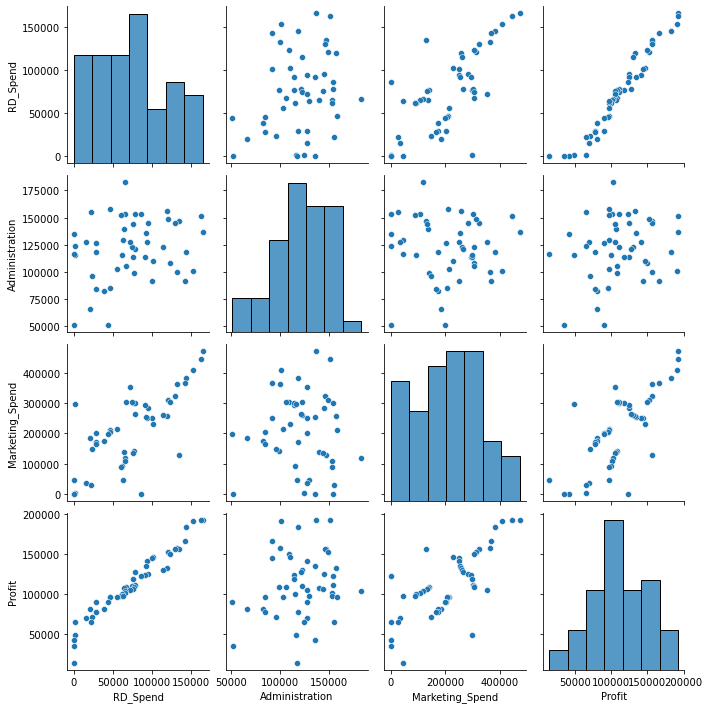

In [43]:
sns.pairplot(df2) #Scatter plot and Hist 

In [44]:
#So here profit is Y variable, so check the plot of profit in Y-axis for better clarity

# Model/Regression equation preparation

In [45]:
smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=df2).fit()

In [46]:
#Note: & symbol is not being taken in column name

In [47]:
model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=df2).fit()

In [48]:
model.params #Finding B0 and B1, B2, B3 values

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [49]:
#Finding t-vaue and p-value
print(model.tvalues,'\n',model.pvalues)

Intercept           7.626218
RD_Spend           17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [ ]:
#COMMENT: p-values are less than 0.05 for all features so all features are significant

In [50]:
#Model accuracy
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [107]:
model.aic

1058.7714985998055

# Accuracy of model is 95% which is excellent; Now we will check for multicolinearity

In [55]:
#Multicolinearity ------ SIMPLE LINEAR REGRESSION MODELS for each variable

## a. Checking Co-relation

In [56]:
m_rd = smf.ols('Profit~RD_Spend',data=df2).fit()
m_rd.tvalues,m_rd.pvalues

(Intercept    19.320288
 RD_Spend     29.151139
 dtype: float64,
 Intercept    2.782697e-24
 RD_Spend     3.500322e-32
 dtype: float64)

In [57]:
#P < 0.05

In [59]:
m_ad = smf.ols('Profit~Administration',data=df2).fit()
m_ad.tvalues,m_ad.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [64]:
# HERE P > 0.05: THIS is more significant; Feature not giving same/similar info as Profit Feature

In [61]:
m_ms = smf.ols('Profit~Marketing_Spend',data=df2).fit()
m_ms.tvalues,m_ms.pvalues

(Intercept          7.808356
 Marketing_Spend    7.802657
 dtype: float64,
 Intercept          4.294735e-10
 Marketing_Spend    4.381073e-10
 dtype: float64)

In [62]:
# P<0.05

## b. Calculating VIF

In [65]:
#Put each value as dependent variable
#FORMULA --> VIFj = 1/1-Rj^2 , where j = each independent variable

In [68]:
smf.ols('RD_Spend~Administration+Marketing_Spend',data=df2).fit().rsquared #calculating r^2

0.5949618224573936

In [69]:
r2_RD = smf.ols('RD_Spend~Administration+Marketing_Spend',data=df2).fit().rsquared
1/(1-r2_RD) #calculating VIF

2.4689030699947017

In [70]:
VIF_RD = 1/(1-r2_RD)

In [71]:
#Similarly for other variables

In [75]:
r2_ad = smf.ols('Administration~RD_Spend+Marketing_Spend',data=df2).fit().rsquared
VIF_ad = 1/(1-r2_ad)

In [79]:
VIF_ad

1.1750910070550453

In [78]:
r2_ms = smf.ols('Marketing_Spend~RD_Spend+Administration',data=df2).fit().rsquared
VIF_ms = 1/(1-r2_ms)

In [80]:
VIF_ms

2.326773290530878

In [81]:
d1 = {'Variables':['RD_Spend','Administration','Marketing_Spend'],'VIF':[VIF_RD,VIF_ad,VIF_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame


,Variables,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


In [82]:
#Smaller VIF indicates LOW correlation between variables

In [83]:
# Under ideal conditions VIF<3. However  it is acceptable if it is less than 10.

# Model Validation

In [84]:
#From errors we judge if model is good or bad

## 1. Errors vs Yi Cap

In [85]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

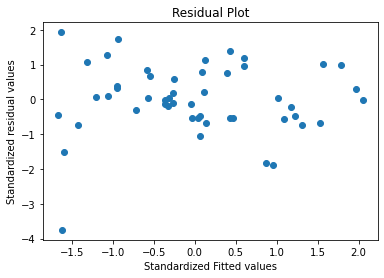

In [86]:
plt.scatter(get_standardized_values(model.fittedvalues), #fitted means predicted values Yi cap
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [87]:
#No pattern seen

## 2. Errors vs Xi (for each Xi)

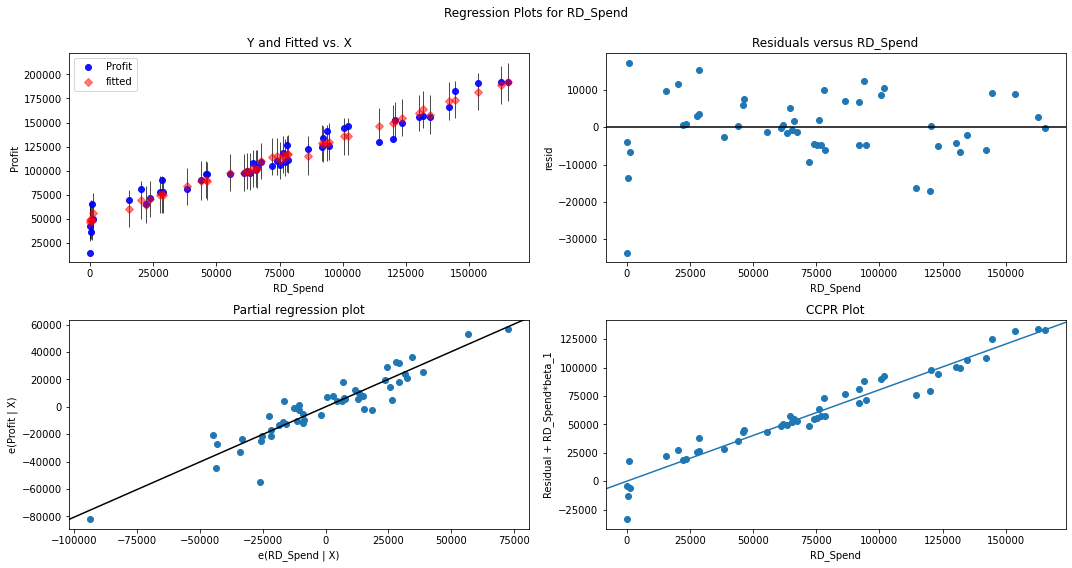

In [89]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

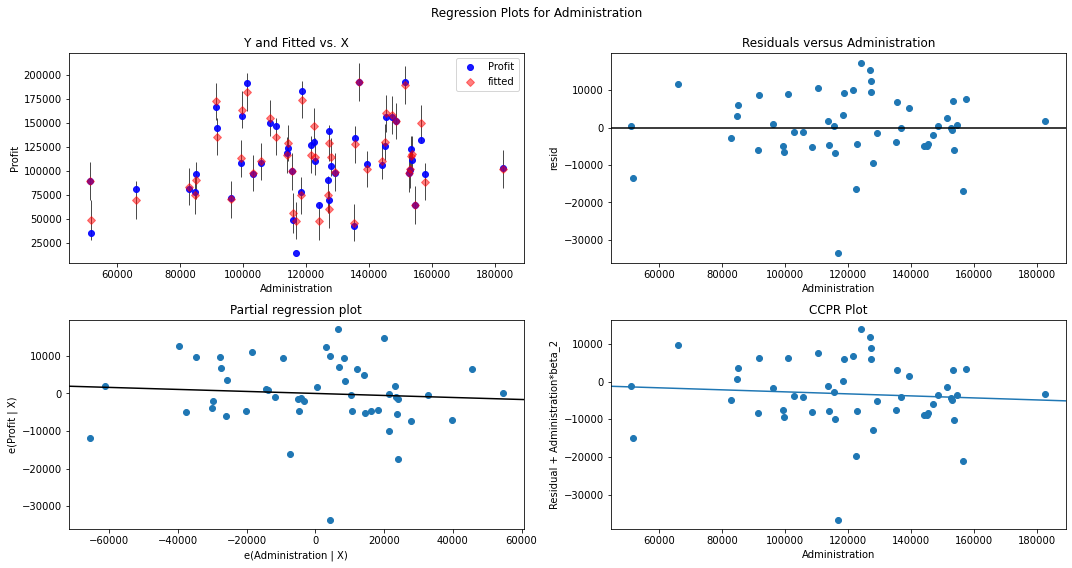

In [90]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

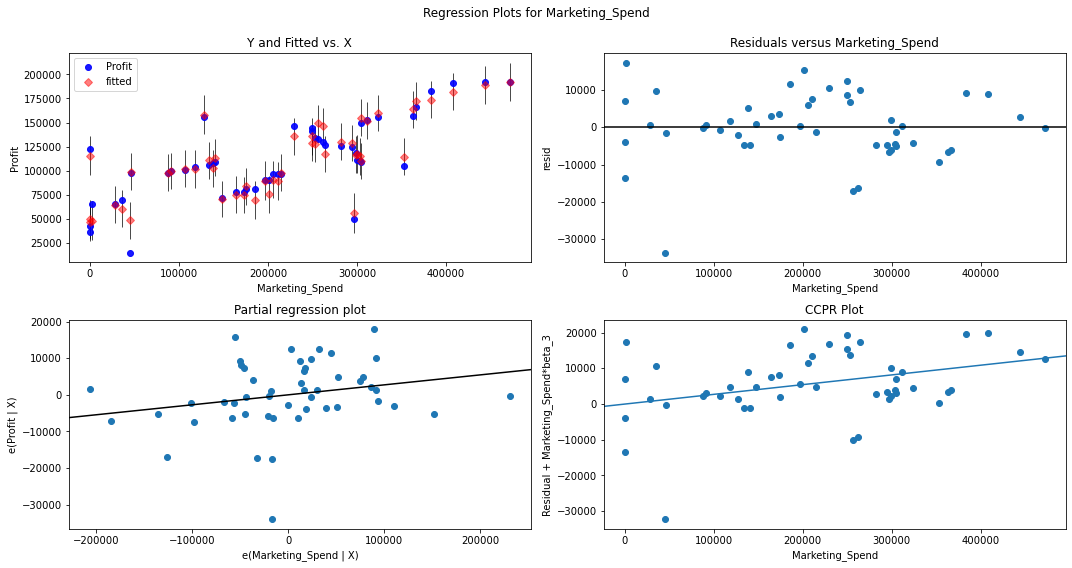

In [91]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

## 3. Q-Q Plot for Normality

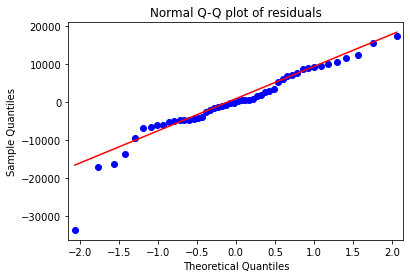

In [111]:
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [115]:
list(np.where(model.resid<-30000))

[array([49])]

In [ ]:
#Only one plot is > -30000 as also seen in figure. This is > 95% of CI.

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## 1. Cook’s Distance

In [93]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

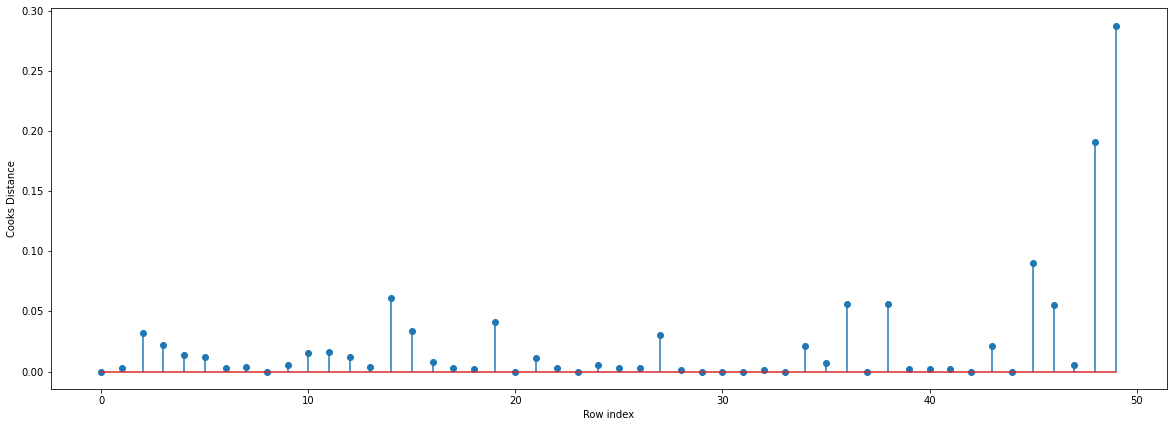

In [100]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [102]:
#index and value of influencer where c is maximum value
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [103]:
# Max c value is < 0.5 and also < 1. So outlier has less influence in regression equation

## 2. High Influence points

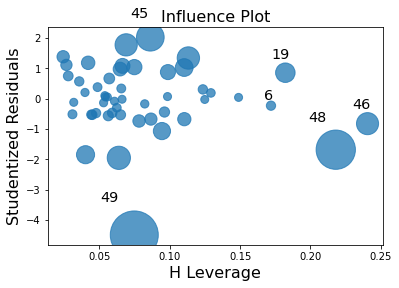

In [104]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [105]:
k = df2.shape[1]
n = df2.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [106]:
leverage_cutoff

0.36

#### From the above plot, it is evident that there are no influencers > leverage cutoff 0.36

# Thus now we can Predict the new data

In [108]:
#New data for prediction
new_data=pd.DataFrame({'RD_Spend':144372.41,"Administration":118671.85,"Marketing_Spend":383199.62},index=[1])

In [109]:
model.predict(new_data)

1    173696.700026
dtype: float64

# Model Prediction for all values

In [110]:
model.predict(df2)

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111
